<h1> Imputation </h1> 
<p>Load in Packages</p>

In [3]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error, roc_auc_score,mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

[0.75       0.58333333 0.71817066 ... 0.70567137 0.72147847 1.        ]
break
[0.75       0.58333333 0.53846154 ... 1.         1.         1.        ]
[0.75       0.58333333 0.53846154 ... 1.         0.73971376 1.        ]
break
[0.75       0.58333333 0.53846154 ... 1.         1.         1.        ]
[0.81064111 0.58333333 0.53846154 ... 1.         1.         1.        ]
break
[0.75       0.58333333 0.53846154 ... 1.         1.         1.        ]
[0.75       0.60622851 0.53846154 ... 0.73228551 1.         1.        ]
break
[0.75       0.58333333 0.53846154 ... 1.         1.         1.        ]
[0.75       0.63909091 0.53846154 ... 0.72215557 1.         1.        ]
break
[0.75       0.58333333 0.53846154 ... 1.         1.         1.        ]
[0.82229598 0.58333333 0.53846154 ... 0.74748561 0.73577667 1.        ]
break
[0.75       0.58333333 0.53846154 ... 1.         1.         1.        ]
[0.76699368 0.62400449 0.68420569 ... 1.         1.         0.76898844]
break
[0.75       0.58333333

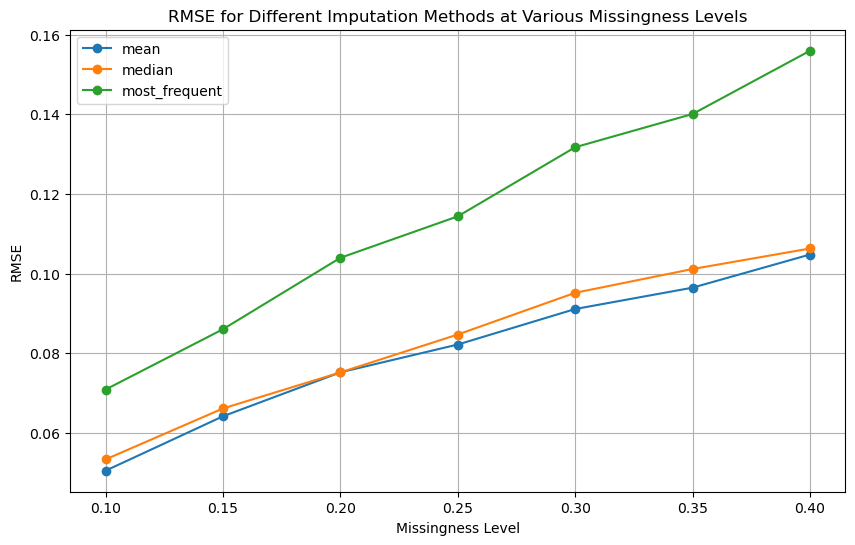

In [4]:
import pandas as pd

# Load the data
df = pd.read_csv('filter_betas.csv', sep=',', index_col=0) # for classification problem

# Separate the feature data (X) and binary group labels (y)
X = df.iloc[:, :-1]  # All columns except the last one
y = df.iloc[:, -1]   # Last column (binary group labels)

# Set seed
np.random.seed(42)

# Split the data into training, testing, and validation sets using a 70/20/10 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from hyperimpute.plugins.imputers import Imputers


def introduce_missing_values(data_frame, missing_percent):
    # Copy the original DataFrame to avoid modifying the original data
    df_with_missing = data_frame.copy()
    
    # Determine the number of missing values to introduce
    num_missing_values = int(df_with_missing.size * missing_percent)
    
    # Randomly select positions to introduce missing values
    random_indices = np.random.choice(df_with_missing.size, num_missing_values, replace=False)
    
    # Convert the 1D indices to 2D coordinates
    rows, cols = np.unravel_index(random_indices, df_with_missing.shape)
    
    # Set the selected positions to NaN
    df_with_missing.iloc[rows, cols] = np.nan
    
    return df_with_missing


# Function to calculate RMSE with missingness
def calculate_rmse_with_missingness(data_frame, imputation_strategies, missing_levels):
    results = []

    for imputation_strategy in imputation_strategies:
        rmse_values = []
        for missing_level in missing_levels:
            data_frame_with_missing = data_frame.copy()
            missing_mask = np.random.rand(*data_frame.shape) < missing_level
            data_frame_with_missing[missing_mask] = np.nan

            if imputation_strategy == "gain":
                # Using hyperimpute for "gain" imputation
                plugin = Imputers().get("gain")
                imputed_values = plugin.fit_transform(data_frame_with_missing)
            elif imputation_strategy == "knn":
                imputer = KNNImputer(n_neighbors=5)  # You can adjust the n_neighbors as needed
                imputed_values = imputer.fit_transform(data_frame_with_missing)
            elif imputation_strategy == "missforest":
                # Using hyperimpute for "miceforest" imputation
                plugin = Imputers().get("missforest")
                imputed_values = plugin.fit_transform(data_frame_with_missing)
            elif imputation_strategy == "hyperimpute":
                # Using hyperimpute for "iterativeSVD" imputation
                plugin = Imputers().get("hyperimpute")
                imputed_values = plugin.fit_transform(data_frame_with_missing)
            else:
                imputer = SimpleImputer(strategy=imputation_strategy)
                imputed_values = imputer.fit_transform(data_frame_with_missing)

            # Convert imputed_values to a numpy array and flatten
            if isinstance(imputed_values, pd.DataFrame):
                imputed_values = imputed_values.values
            imputed_values = imputed_values.flatten()

            # Flatten the numpy arrays to compute overall RMSE
            original_values = data_frame.values.flatten()

            # Remove NaNs from the original values and imputed values
            mask = ~np.isnan(original_values) & ~np.isnan(imputed_values)
            original_values = original_values[mask]
            imputed_values = imputed_values[mask]
            print(imputed_values)
            print('break')
            print(original_values)
            rmse = np.sqrt(mean_squared_error(original_values, imputed_values))
            rmse_values.append(rmse)

        results.append((imputation_strategy, rmse_values))

    return results

# Define the missingness levels (adjust as needed)
missing_levels = [0.1, 0.15, 0.2, 0.25, 0.30, 0.35, 0.40]

# Define the list of imputation strategies to test
imputation_strategies = ['mean','median', 'most_frequent',] #'knn', 'gain','hyperimpute', 'missforest']

# Load the data
df = pd.read_csv('filter_betas.csv', sep=',', index_col=0) # for classification problem
df = df.drop('group', axis=1)

# Calculate RMSE for each level of missingness and each imputation method
rmse_results = calculate_rmse_with_missingness(X_train, imputation_strategies, missing_levels)

# Create a plot showing RMSE for each imputation method at different missingness levels
plt.figure(figsize=(10, 6))
for imputation_strategy, rmse_values in rmse_results:
    plt.plot(missing_levels, rmse_values, marker='o', label=imputation_strategy)

plt.title("RMSE for Different Imputation Methods at Various Missingness Levels")
plt.xlabel("Missingness Level")
plt.ylabel("RMSE")
plt.legend()
plt.grid(True)
plt.show()


In [5]:
import pandas as pd

# Convert the RMSE results into a DataFrame
df_rmse = pd.DataFrame(rmse_results, columns=["Imputation Strategy", "RMSE Values"])

# Convert the RMSE values list into separate columns for each missingness level
for idx, level in enumerate([0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40]):
    df_rmse[f"Missingness Level {level}"] = df_rmse["RMSE Values"].apply(lambda x: x[idx])

# Drop the original "RMSE Values" column
df_rmse.drop("RMSE Values", axis=1, inplace=True)

# Display the DataFrame
print(df_rmse)
# Save the DataFrame to a CSV file
df_rmse.to_csv('imputation_rmse_results.csv', index=False)

  Imputation Strategy  Missingness Level 0.1  Missingness Level 0.15  \
0                mean               0.050500                0.064166   
1              median               0.053338                0.066134   
2       most_frequent               0.070882                0.086036   

   Missingness Level 0.2  Missingness Level 0.25  Missingness Level 0.3  \
0               0.075210                0.082195               0.091116   
1               0.075197                0.084711               0.095191   
2               0.103973                0.114388               0.131752   

   Missingness Level 0.35  Missingness Level 0.4  
0                0.096480               0.104806  
1                0.101164               0.106317  
2                0.140101               0.155989  


In [5]:
imputed_df_Itt_RF = imputed_df[0]

NameError: name 'imputed_df' is not defined

In [ ]:
#function to impute missing values seperating the case and the control groups and imputing them seperatly before returning a new df 

def impute_missing_values(dataframe, methods=['mean', 'median', 'mode', 'knn',]):
    imputed_dataframes = []
    target_column = dataframe.columns[-1]  # The target column is the last column in the original DataFrame, so this is removed from the imputation

    # Split the dataframe into two groups based on the target column
    group1 = dataframe[dataframe[target_column] == 1]
    group2 = dataframe[dataframe[target_column] == 0]

    for method in methods:
        df1 = group1.copy()
        df2 = group2.copy()

        if method == 'mean':
            imputer = SimpleImputer(strategy='mean')
        elif method == 'median':
            imputer = SimpleImputer(strategy='median')
        elif method == 'mode':
            imputer = SimpleImputer(strategy='most_frequent')
        elif method == 'knn':
            imputer = KNNImputer(n_neighbors=5)
        else:
            raise ValueError(f"Invalid imputation method: {method}")

        # Exclude the target column from imputation
        df1.iloc[:, :-1] = imputer.fit_transform(df1.iloc[:, :-1])
        df2.iloc[:, :-1] = imputer.fit_transform(df2.iloc[:, :-1])

        # Re-merge the imputed dataframes
        imputed_df = pd.concat([df1, df2])
        imputed_dataframes.append(imputed_df)

    return imputed_dataframes

In [174]:
#impute the missing vales of the new df 
Aditional_missing_impute = impute_missing_values(Aditional_missing)

imputed_df_mean = imputed_df[0]
imputed_df_median = imputed_df[1]
imputed_df_mode = imputed_df[2]
imputed_df_knn = imputed_df[3]

#mean_missing_imp = impute_missing_values(df, methods=['mean'])
#median_missing_imp = impute_missing_values(df, methods=['median'])
#mode_missing_imp = impute_missing_values(mode_missing, methods=['mode'])
#knn_missing_imp = impute_missing_values(knn_missing, methods=['knn'])                     
                                                     

In [150]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_imputation(imputed_df, real_df):
    metrics = ['RMSE','MSE', 'MAE', 'R2']
    
    # Convert dataframes to arrays
    imputed_array = imputed_df.values.flatten()
    real_array = np.array(real_df).flatten()
    
    for metric in metrics:
        if metric == 'RMSE':
            error = mean_squared_error(real_array, imputed_array, squared=False)
        if metric == 'MSE':
            error = mean_squared_error(real_array, imputed_array, squared=True)
        elif metric == 'MAE':
            error = mean_absolute_error(real_array, imputed_array)
        elif metric == 'R2':
            error = r2_score(real_array, imputed_array)
                
        print(f'{metric}: {error}')
    print('---')  # Separator between DataFrame pairs

In [175]:
mean_evlauate = evaluate_imputation(imputed_df_mean, df)
median_evlauate = evaluate_imputation(imputed_df_median, df)
mode_evlauate = evaluate_imputation(imputed_df_mode, df)
knn_evlauate = evaluate_imputation(imputed_df_knn, df)

ValueError: Input contains NaN.

In [163]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score

def calculate_scores(imputed_dfs, target_column='group'):
    scores = {}

    # Splitting the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        imputed_dfs[0].drop(target_column, axis=1),
        imputed_dfs[0][target_column],
        test_size=0.3,
        random_state=42
    )

    for method, df in zip(['mean', 'median', 'mode', 'knn'], imputed_dfs):
        # Creating a logistic regression model
        model = LogisticRegression(max_iter=100)

        # Imputed data and target variable
        X_imputed = df.drop(target_column, axis=1)
        y_imputed = df[target_column]

        # Fitting the model
        model.fit(X_imputed, y_imputed)

        # Predicting on the test set
        y_pred = model.predict(X_test)

        if len(set(y_test)) > 1:
            # Calculating AUC score
            auc = roc_auc_score(y_test, y_pred)
            scores[method]['AUC'] = auc

    return scores

In [167]:
scores = calculate_scores(imputed_df)

KeyError: 'mean'

In [168]:
scores = calculate_scores(imputed_df)

# Print the scores for each method
for method, score in scores.items():
    print(f"Imputation method: {method}")
    if 'AUC' in score:
        print(f"AUC: {score['AUC']}")
    print()

KeyError: 'mean'

In [42]:
imputed_knn_df.to_csv('knn_imputed_data.tsv', sep='\t', index=True)

https://www.theanalyticslab.nl/no-data-scientist-is-the-same-guide-to-manage-missing-data/